<a href="https://colab.research.google.com/github/nwferreri/multilinear-regression/blob/main/multilinear_regression_store_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multilinear Regression

Use Multilinear Regression to study a store's sales drivers.  Information about the data can be found in the *Sales-Data-Mens-Fashion-Stores.pdf*.

1. Pick variables for the model
2. Analyze the data, i.e. generate summary statistics
3. Create a correlation matrix
4. Create traing and test data sets
5. Create a multilinear regression
6. Assess the accuracy of the model
7. Try to improve model

# 0. Libraries, directory, and data

In [ ]:
# Directory
%cd /content/drive/MyDrive/ZTM/Python for Business/Statistics and Descriptive Analytics/Multilinear Regression

/content/drive/MyDrive/ZTM/Python for Business/Statistics and Descriptive Analytics/Multilinear Regression


In [ ]:
# Libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Load the data
sales_df = pd.read_csv('Clothing.csv')
sales_df.head()

,tsales,sales,margin,nown,nfull,npart,naux,hoursw,hourspw,inv1,inv2,ssize,start
0,750000,4411.765,41.0,1.0,1.0000,1.0000,1.5357,76,16.75596,17166.67,27177.04,170,41.0
1,1926395,4280.878,39.0,2.0,2.0000,3.0000,1.5357,192,22.49376,17166.67,27177.04,450,39.0
2,1250000,4166.667,40.0,1.0,2.0000,2.2222,1.4091,114,17.19120,292857.20,71570.55,300,40.0
3,694227,2670.104,40.0,1.0,1.0000,1.2833,1.3673,100,21.50260,22207.04,15000.00,260,40.0
4,750000,15000.000,44.0,2.0,1.9556,1.2833,1.3673,104,15.74279,22207.04,10000.00,50,44.0


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tsales   400 non-null    int64  
 1   sales    400 non-null    float64
 2   margin   400 non-null    float64
 3   nown     400 non-null    float64
 4   nfull    400 non-null    float64
 5   npart    400 non-null    float64
 6   naux     400 non-null    float64
 7   hoursw   400 non-null    int64  
 8   hourspw  400 non-null    float64
 9   inv1     400 non-null    float64
 10  inv2     400 non-null    float64
 11  ssize    400 non-null    int64  
 12  start    400 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 40.8 KB


## 1. Pick the variables

To predict which factors drive sales, we should use `tsales` as the DV.  Therefore, we don't need `sales`.

There are multiple columns related to number of different kinds of workers: `nfull`, `npart`, and `naux`.  Does the number of workers influence the total sales or does the total sales influence the number of workers?  Mutual Causality Bias

The number of hours worked and worked by each employee may not lead to sales, so we can remove.

In [ ]:
sales_df_useful = sales_df[['tsales', 'margin', 'nown', 'inv1', 'inv2', 'ssize', 'start']]
sales_df_useful.head()

,tsales,margin,nown,inv1,inv2,ssize,start
0,750000,41.0,1.0,17166.67,27177.04,170,41.0
1,1926395,39.0,2.0,17166.67,27177.04,450,39.0
2,1250000,40.0,1.0,292857.20,71570.55,300,40.0
3,694227,40.0,1.0,22207.04,15000.00,260,40.0
4,750000,44.0,2.0,22207.04,10000.00,50,44.0


## 2. Analyze Data (summary statistics)

In [ ]:
sales_df_useful.describe()

,tsales,margin,nown,inv1,inv2,ssize,start
count,4.000000e+02,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.000000
mean,8.335842e+05,38.774230,1.283796,5.825726e+04,27829.217000,151.050000,42.808462
std,5.834638e+05,5.218184,0.639773,1.075588e+05,41501.943418,112.498254,13.296070
min,5.000000e+04,16.000000,1.000000,1.000000e+03,350.000000,16.000000,16.000000
25%,4.953400e+05,37.000000,1.000000,2.000000e+04,10000.000000,80.000000,37.000000
50%,6.942270e+05,39.000000,1.000000,2.220704e+04,22859.850000,120.000000,40.000000
75%,9.768170e+05,41.000000,1.295225,6.226923e+04,22859.850000,190.000000,42.000000
max,5.000000e+06,66.000000,10.000000,1.500000e+06,400000.000000,1214.000000,90.000000


##3. Create Correlation Matrix

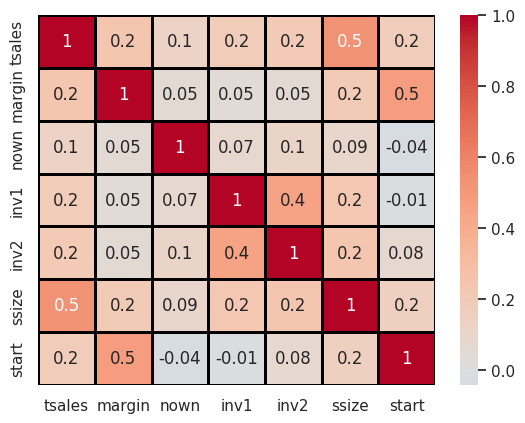

In [ ]:
sns.set(font_scale=1)
sns.heatmap(sales_df_useful.corr(numeric_only=True),
            annot=True,
            fmt='.1g',
            center=0,
            cmap='coolwarm',
            linewidths=1,
            linecolor='black');

##4. Create Training and Test data sets

In [ ]:
# Isolate X & y
y = sales_df_useful.tsales
X = sales_df_useful.drop(columns=['tsales'])
X.head()

,margin,nown,inv1,inv2,ssize,start
0,41.0,1.0,17166.67,27177.04,170,41.0
1,39.0,2.0,17166.67,27177.04,450,39.0
2,40.0,1.0,292857.20,71570.55,300,40.0
3,40.0,1.0,22207.04,15000.00,260,40.0
4,44.0,2.0,22207.04,10000.00,50,44.0


In [ ]:
y.head()

0     750000
1    1926395
2    1250000
3     694227
4     750000
Name: tsales, dtype: int64

In [ ]:
# Add constant to X
X = sm.add_constant(X)
X.head()

,const,margin,nown,inv1,inv2,ssize,start
0,1.0,41.0,1.0,17166.67,27177.04,170,41.0
1,1.0,39.0,2.0,17166.67,27177.04,450,39.0
2,1.0,40.0,1.0,292857.20,71570.55,300,40.0
3,1.0,40.0,1.0,22207.04,15000.00,260,40.0
4,1.0,44.0,2.0,22207.04,10000.00,50,44.0


In [ ]:
# Create training and test data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1502)
X_train.head()

,const,margin,nown,inv1,inv2,ssize,start
201,1.0,42.0,3.0,22207.04,400000.00,400,42.0
25,1.0,35.0,1.0,62269.23,20000.00,160,35.0
94,1.0,39.0,1.0,22207.04,22859.85,200,39.0
346,1.0,47.0,1.0,292857.20,200000.00,450,47.0
121,1.0,37.0,1.0,22207.04,1200.00,350,37.0


##5. Create Multilinear Regression

In [ ]:
# Create the model
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 tsales   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     23.57
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           5.64e-23
Time:                        20:20:02   Log-Likelihood:                -4635.1
No. Observations:                 320   AIC:                             9284.
Df Residuals:                     313   BIC:                             9311.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.749e+05   2.07e+05     -0.843      0.4

Based on the p-values above, it seems that only `ssize` and possibly `margin` are statistically significant.

##6. Assess Accuracy

In [ ]:
# Make predictions
y_preds = model.predict(X_test)
y_preds[:5]

270    1.621699e+06
380    7.713513e+05
326    6.928708e+05
60     6.435912e+05
316    3.098840e+05
dtype: float64

In [ ]:
# Accuracy assessment
print('MAE:', round(mean_absolute_error(y_test, y_preds), 1))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test, y_preds)), 1))

MAE: 346929.5
RMSE: 529017.5


RMSE is much higher than MAE, indicating that our model may be strongly affected by outliers.

# 7. Try to improve model

Try to improve the model using only the statistically significant variables.

In [ ]:
# Reset X and y based on regression summary
# Isolate X & y
y = sales_df_useful.tsales
X = sales_df_useful[['ssize', 'margin']]
X = sm.add_constant(X)
X.head()

,const,ssize,margin
0,1.0,170,41.0
1,1.0,450,39.0
2,1.0,300,40.0
3,1.0,260,40.0
4,1.0,50,44.0


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1502)
X_train.head()

,const,ssize,margin
201,1.0,400,42.0
25,1.0,160,35.0
94,1.0,200,39.0
346,1.0,450,47.0
121,1.0,350,37.0


In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(320, 320, 80, 80)

In [ ]:
# Create another model
model2 = sm.OLS(y_train, X_train).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 tsales   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     68.17
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           2.37e-25
Time:                        20:20:10   Log-Likelihood:                -4637.5
No. Observations:                 320   AIC:                             9281.
Df Residuals:                     317   BIC:                             9292.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.506e+05   1.96e+05     -0.767      0.4

In [ ]:
# Make predictions
y_preds = model2.predict(X_test)
y_preds[:5]

270    1.690197e+06
380    7.315487e+05
326    7.128565e+05
60     6.832401e+05
316    3.118696e+05
dtype: float64

In [ ]:
# Accuracy assessment
print('MAE:', round(mean_absolute_error(y_test, y_preds), 1))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test, y_preds)), 1))

MAE: 346792.6
RMSE: 532297.8


Didn't get any better... more investigation required.